In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

#setting plot style to seaborn
plt.style.use('seaborn')

In [9]:
#reading data
df = pd.read_csv("/Users/apple/Desktop/citibike_2013.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             577703 non-null  int64  
 1   starttime                577703 non-null  object 
 2   stoptime                 577703 non-null  object 
 3   start station id         577703 non-null  int64  
 4   start station name       577703 non-null  object 
 5   start station latitude   577703 non-null  float64
 6   start station longitude  577703 non-null  float64
 7   end station id           559644 non-null  float64
 8   end station name         559644 non-null  object 
 9   end station latitude     559644 non-null  float64
 10  end station longitude    559644 non-null  float64
 11  bikeid                   577703 non-null  int64  
 12  usertype                 577703 non-null  object 
 13  birth year               337382 non-null  float64
 14  gend

In [12]:
#we have 5,77,703 rows and 15 columns, seems to be quite a bit of missing values
#sum of missing values in each column
df.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id              18059
end station name            18059
end station latitude        18059
end station longitude       18059
bikeid                          0
usertype                        0
birth year                 240321
gender                          0
dtype: int64

In [13]:
#calculating the percentage of missing values
data_loss1 = round((df['end station id'].isna().sum()/df.shape[0])*100)
data_loss2 = round((df['birth year'].isna().sum()/df.shape[0])*100)

print(data_loss1, '% of data loss if NaN rows of end station id, \nend station name, end station latitude and end station longitude dropped.\n')
print(data_loss2, '% of data loss if NaN rows of birth year dropped.')

3 % of data loss if NaN rows of end station id, 
end station name, end station latitude and end station longitude dropped.

42 % of data loss if NaN rows of birth year dropped.


In [14]:
#dropping NaN values
rows_before_dropping = df.shape[0]

#droppping missing valued rows from birth year will a loss of 42% of data,
#so decided to drop entire birth year column.
df.drop('birth year',axis=1, inplace=True)

#Now left with end station id, end station name, end station latitude and end station longitude
#these four columns have missing values in exact same row,
#so dropping NaN from all four columns will still result in 3% data loss
df.dropna(axis=0, inplace=True)
rows_after_dropping = df.shape[0]

#total data loss
print('% of data lost: ',((rows_before_dropping-rows_after_dropping)/rows_before_dropping)*100)

#checking for NaN
df.isna().sum()

% of data lost:  3.1260007304791557


tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
gender                     0
dtype: int64

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


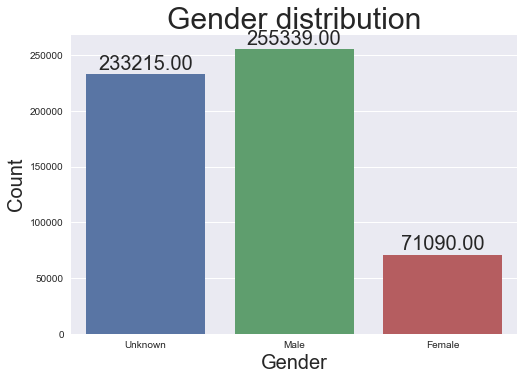

In [15]:
#plotting total no.of males and females
splot = sns.countplot('gender', data=df)

#adding value above each bar:Annotation
for p in splot.patches:
    an = splot.annotate(format(p.get_height(), '.2f'),
                        #bar value is nothing but height of the bar
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center',
                       va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    an.set_size(20)#test size
splot.axes.set_title("Gender distribution",fontsize=30)
splot.axes.set_xlabel("Gender",fontsize=20)
splot.axes.set_ylabel("Count",fontsize=20)

#adding x tick values
splot.axes.set_xticklabels(['Unknown', 'Male', 'Female'])
plt.show()

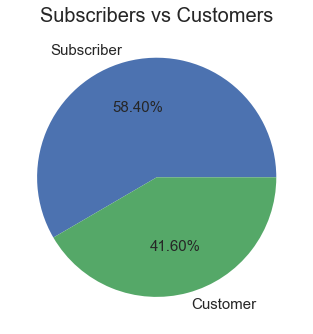

In [16]:
#number of subscribers(annual pass) vs customers(24 hours/3day pass)
user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

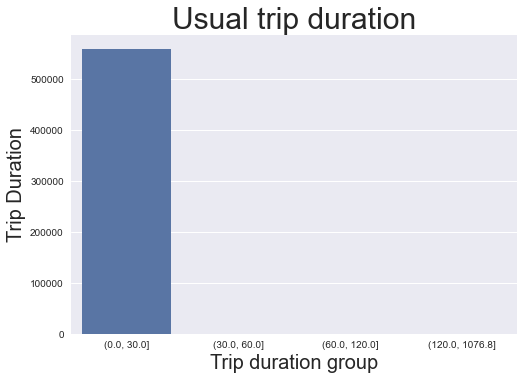

In [18]:
#converting trip duration from seconds to minuits
df['tripduration'] = df['tripduration']/60

#creating bins (0-30min, 30-60min, 60-120min, 120 and above)
max_limit = df['tripduration'].max()
df['tripduration_bins'] = pd.cut(df['tripduration'], [0, 30, 60, 120, max_limit])

sns.barplot(x='tripduration_bins', y='tripduration', data=df, estimator=np.size)
plt.title('Usual trip duration', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.show()

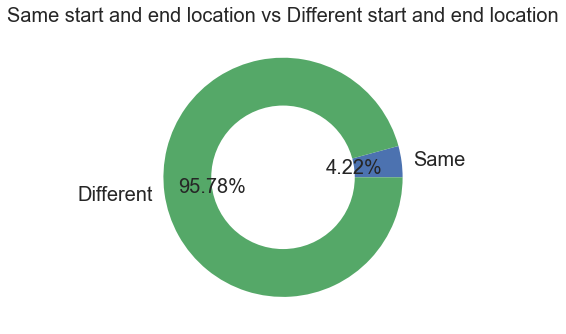

In [19]:
#number of trips that started and ended at same station
start_end_same = df[df['start station name'] == df['end station name']].shape[0]

#number of trips that started and ended at different station
start_end_diff = df.shape[0]-start_end_same

fig,ax=plt.subplots()
ax.pie([start_end_same,start_end_diff], labels=['Same', 'Different'], autopct='%1.2f%%', textprops={'fontsize': 20})
ax.set_title('Same start and end location vs Different start and end location', fontsize=20)


circle = Circle((0,0), 0.6, facecolor='white')
ax.add_artist(circle)

plt.show()

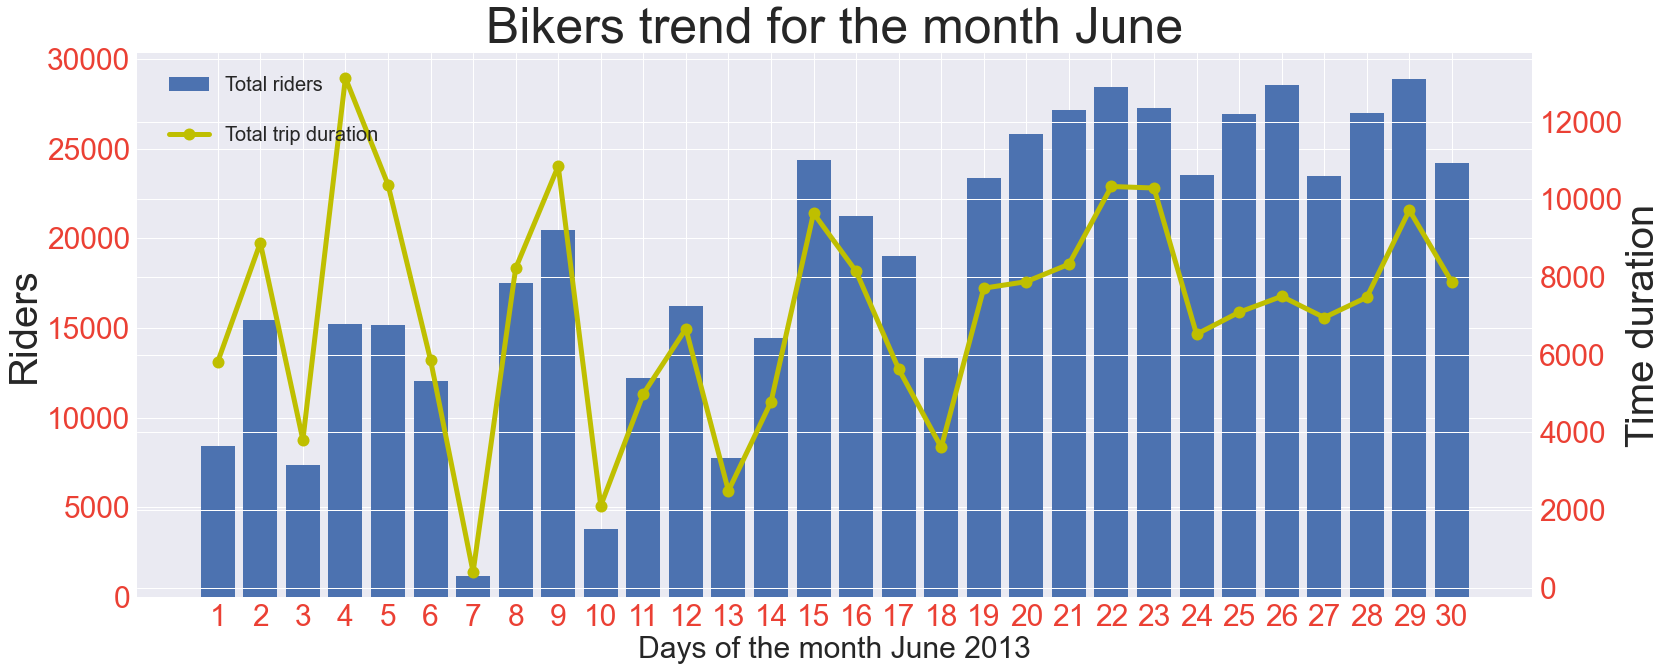

In [20]:
#converting string to datetime object
df['starttime']= pd.to_datetime(df['starttime'])

#since we are dealing with single month, we grouping by days
#using count aggregation to get number of occurances i.e, total trips per day
start_time_count = df.set_index('starttime').groupby(pd.Grouper(freq='D')).count()

#we have data from July month for only one day which is at last row, lets drop it
start_time_count.drop(start_time_count.tail(1).index, axis=0, inplace=True)

#again grouping by day and aggregating with sum to get total trip duration per day
#which will used while plotting
trip_duration_count = df.set_index('starttime').groupby(pd.Grouper(freq='D')).sum()

#again dropping the last row for same reason
trip_duration_count.drop(trip_duration_count.tail(1).index, axis=0, inplace=True)

#plotting total rides per day
#using start station id to get the count
fig,ax=plt.subplots(figsize=(25,10))
ax.bar(start_time_count.index, 'start station id', data=start_time_count, label='Total riders')
#bbox_to_anchor is to position the legend box
ax.legend(loc ="lower left", bbox_to_anchor=(0.01, 0.89), fontsize='20')
ax.set_xlabel('Days of the month June 2013', fontsize=30)
ax.set_ylabel('Riders',  fontsize=40)
ax.set_title('Bikers trend for the month June', fontsize=50)

#creating twin x axis to plot line chart is same figure
ax2=ax.twinx()
#plotting total trip duration of all user per day
ax2.plot('tripduration', data=trip_duration_count, color='y', label='Total trip duration', marker='o', linewidth=5, markersize=12)
ax2.set_ylabel('Time duration',  fontsize=40)
ax2.legend(loc ="upper left", bbox_to_anchor=(0.01, 0.9), fontsize='20')

ax.set_xticks(trip_duration_count.index)
ax.set_xticklabels([i for i in range(1,31)])

#tweeking x and y ticks labels of axes1
ax.tick_params(labelsize=30, labelcolor='#eb4034')
#tweeking x and y ticks labels of axes2
ax2.tick_params(labelsize=30, labelcolor='#eb4034')

plt.show()

<ipython-input-21-dc0b6341c3b0>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_start_station.index, rotation = 45, ha="right")


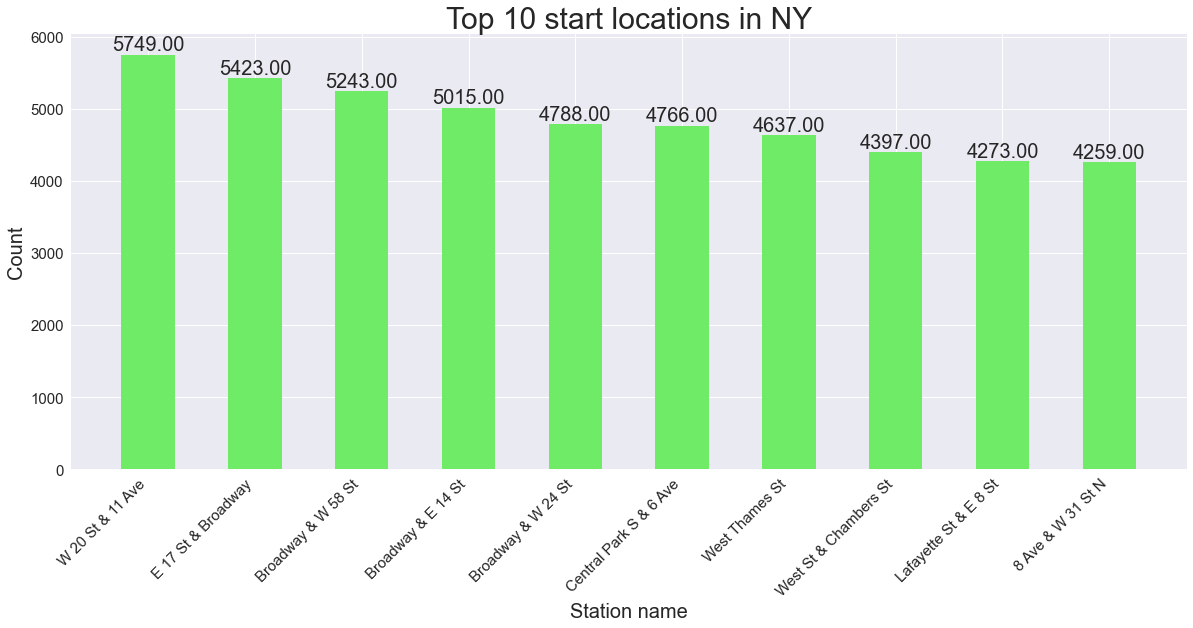

In [21]:
#top 10 start station
top_start_station = df['start station name'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_start_station.index, height=top_start_station.values, color='#70eb67', width=0.5)

#adding value above each bar:Annotation
for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 start locations in NY",fontsize=30)
ax.set_xlabel("Station name",fontsize=20)

#rotating the x tick labels to 45 degrees
ax.set_xticklabels(top_start_station.index, rotation = 45, ha="right")
ax.set_ylabel("Count",fontsize=20)
#tweeking x and y tick labels 
ax.tick_params(labelsize=15)
plt.show()

<ipython-input-22-06ebcde914a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_end_station.index, rotation = 45, ha="right")


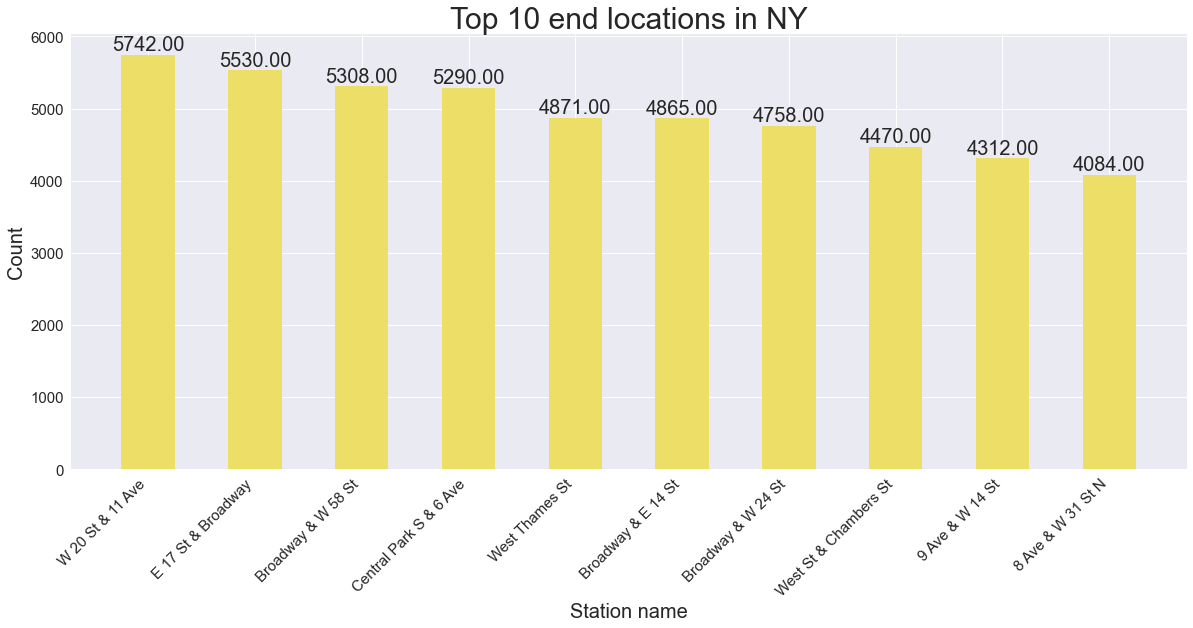

In [22]:
#top 10 end station
top_end_station = df['end station name'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_end_station.index, height=top_end_station.values, color='#edde68', width=0.5)

#adding value above each bar:Annotation
for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 end locations in NY",fontsize=30)
ax.set_xlabel("Station name",fontsize=20)

#rotating the x tick labels to 45 degrees
ax.set_xticklabels(top_end_station.index, rotation = 45, ha="right")
ax.set_ylabel("Count",fontsize=20)
#tweeking x and y tick labels 
ax.tick_params(labelsize=15)
plt.show()


In [23]:
#There is a significant number of male riders in New York City, but due to a large number of unknown gender entries, it's challenging to draw concrete conclusions about gender distribution. The decision not to fill in unknown gender values is based on the riders' choice not to disclose this information.

#There are more yearly subscribers than 1/3-day customers, although the difference is not substantial. The company can focus on converting more 1/3-day customers into yearly subscribers.

#Many riders take trips lasting less than half an hour, with most rides lasting less than one hour.

#Almost 96% of rides have different start and end locations, indicating that one-way trips are common.

#The number of riders increases significantly as the month progresses, especially towards the end of the month.

#There are very few riders on the 1st Sunday of the month.

#The amount of time riders use the bike decreases as the month nears its end.

#The top 10 trip start locations are provided, with "W 20 St & 11 Ave" being the most popular.

#The top 10 trip start locations are reiterated, but the order is slightly different. The most popular start location remains "W 20 St & 11 Ave."

#In summary, the data suggests trends in rider demographics, usage patterns, and popular trip start locations in New York City. However, it also highlights the challenges of dealing with unknown gender entries and the need to focus on converting short-term customers into yearly subscribers.

